# 🏠 House Price Prediction – EDA & Modeling

## 1. Import Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import root_mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import joblib

## 2. Load Dataset

In [5]:
df = pd.read_csv('../data/train.csv')
print("Shape of data:", df.shape)
df.head()

Shape of data: (1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## 3. Exploratory Data Analysis (EDA)

<Axes: title={'center': 'Missing Values'}>

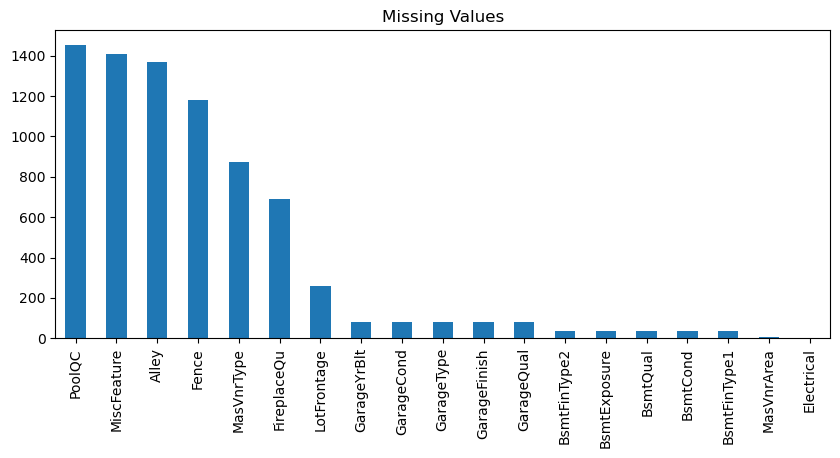

In [7]:
# Missing values
missing = df.isnull().sum().sort_values(ascending=False)
missing[missing > 0].plot(kind='bar', figsize=(10,4), title='Missing Values')

Text(0.5, 1.0, 'Correlation Matrix')

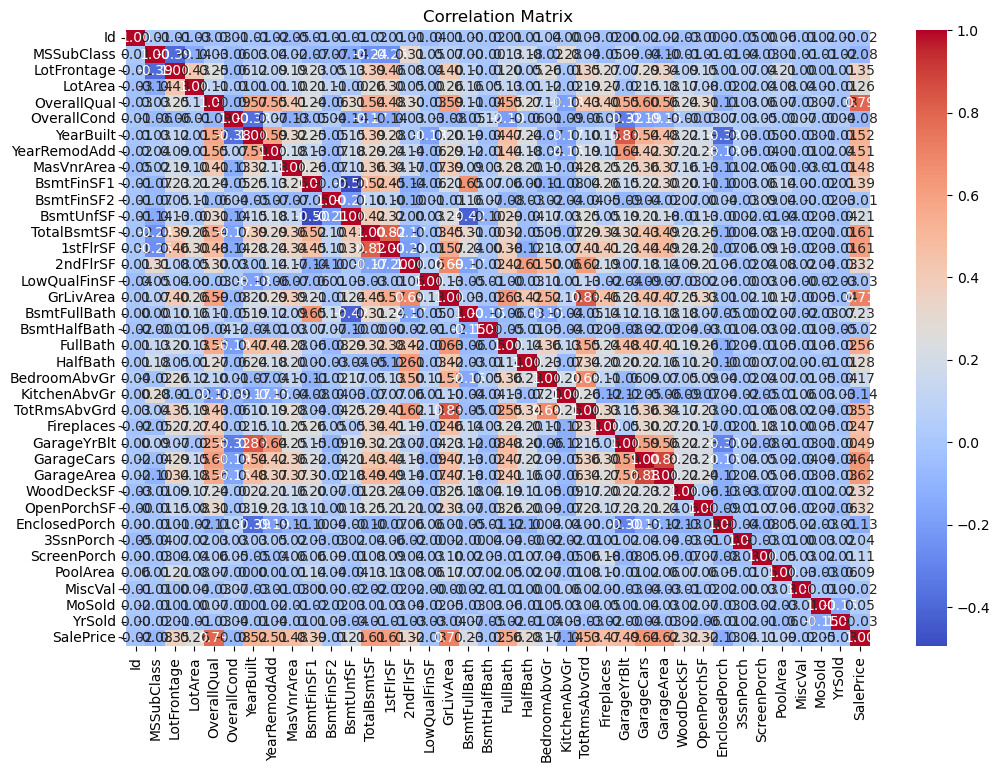

In [8]:
# Correlation heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')

Text(0.5, 1.0, 'Distribution of Sale Price')

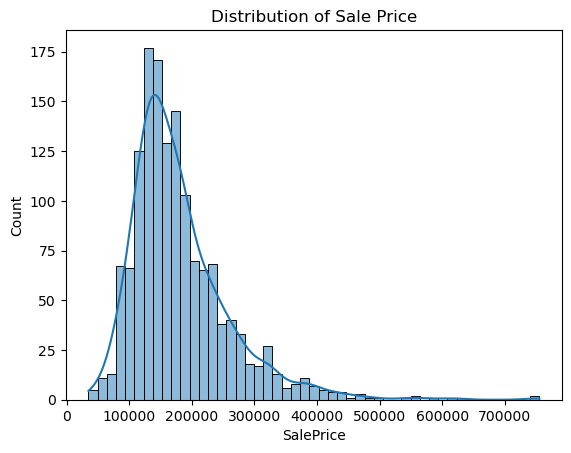

In [9]:
# Distribution of target variable
sns.histplot(df['SalePrice'], kde=True)
plt.title('Distribution of Sale Price')

## 4. Data Preprocessing

In [11]:
# Drop columns with too many missing values
df = df.drop(columns=['Alley', 'PoolQC', 'Fence', 'MiscFeature'])

# Fill missing numerical with median
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
for col in num_cols:
    df[col] = df[col].fillna(df[col].median())

# Fill missing categorical with mode
cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

In [12]:
# One-hot encode categorical variables
df = pd.get_dummies(df)

# Split features and target
X = df.drop('SalePrice', axis=1)
y = df['SalePrice']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## 5. Model Training

In [15]:
# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

In [16]:
# Random Forest
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

## 6. Model Evaluation

In [18]:
def evaluate_model(y_true, y_pred, name="Model"):
    rmse = root_mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{name} RMSE: {rmse:.2f}")
    print(f"{name} R^2 Score: {r2:.2f}")

evaluate_model(y_test, y_pred_lr, "Linear Regression")
evaluate_model(y_test, y_pred_rf, "Random Forest")

Linear Regression RMSE: 35157368555756352.00
Linear Regression R^2 Score: -161145762302405172527104.00
Random Forest RMSE: 28907.49
Random Forest R^2 Score: 0.89


## 7. Save Model

In [20]:
joblib.dump(rf, '../models/house_price_rf_model.pkl')

['../models/house_price_rf_model.pkl']